In [2]:
# Goals is to:
#   read in the sample data file
#   remove funny spellings due to accented vowels not reading correctly in a text file
#   consolidate spellings/languages where appropriate

In [3]:
# Importing Wine Data
#import dependencies
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#read in the data and store it in DF
wine_df = pd.read_csv('https://raw.githubusercontent.com/saraegregg/Mod20_Group_Challenge/main/resources/wine_data.csv', encoding= 'unicode_escape')
wine_df.head(10)

c:\Users\SE\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulka Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O'Keefe,@kerinokeefe,Nicosia 2013 Vulka Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O'Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewurztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewurztraminer (Rheinhe...,Gewurztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
wine_df = wine_df.drop(["Unnamed: 0", "taster_twitter_handle", "designation", "region_2"], 1)

c:\Users\SE\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   taster_name  103727 non-null  object 
 7   title        129971 non-null  object 
 8   variety      129970 non-null  object 
 9   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


In [7]:
wine_df = wine_df.dropna()

In [8]:
#Basic EDA
# measures of central tendency
# show width/breadth of data distribution

# inspect df
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77267 entries, 2 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      77267 non-null  object 
 1   description  77267 non-null  object 
 2   points       77267 non-null  int64  
 3   price        77267 non-null  float64
 4   province     77267 non-null  object 
 5   region_1     77267 non-null  object 
 6   taster_name  77267 non-null  object 
 7   title        77267 non-null  object 
 8   variety      77267 non-null  object 
 9   winery       77267 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.5+ MB


In [9]:
#measures of central tendency for the numerical columns
wine_df.describe()

,points,price
count,77267.000000,77267.000000
mean,88.673431,36.912395
std,2.945305,44.598806
min,80.000000,4.000000
25%,87.000000,18.000000
50%,89.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


### Create a Box and Whisker to See the Spread of Points Data

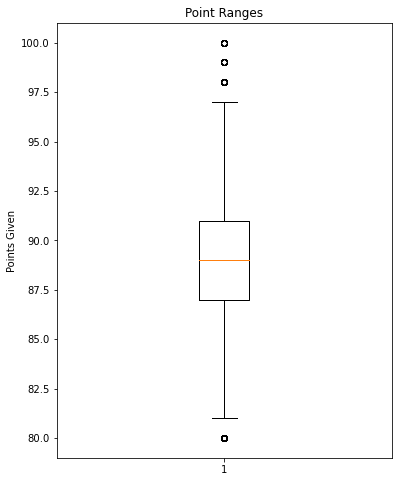

In [10]:
# Creating box and whisker for wine points
data_points = wine_df["points"]
 
fig = plt.figure(figsize =(6, 8))
 
# Creating plot
plt.boxplot(data_points)
plt.ylabel("Points Given")
plt.title("Point Ranges")
 
# show plot
plt.show()

### Create a Chart with Points per Wine for Each Country

In [19]:
#Make the x and y axes
x_axis = wine_df["country"]
y_axis = wine_df["points"]

points
80       208
81       321
82       756
83      1547
84      3057
85      4997
86      6905
87      9635
88     10980
89      7870
90      9686
91      7480
92      5930
93      4122
94      2350
95       924
96       304
97       120
98        49
99        14
100       12
Name: country, dtype: int64

Text(0.5, 1.0, 'Wines and their Point Values')

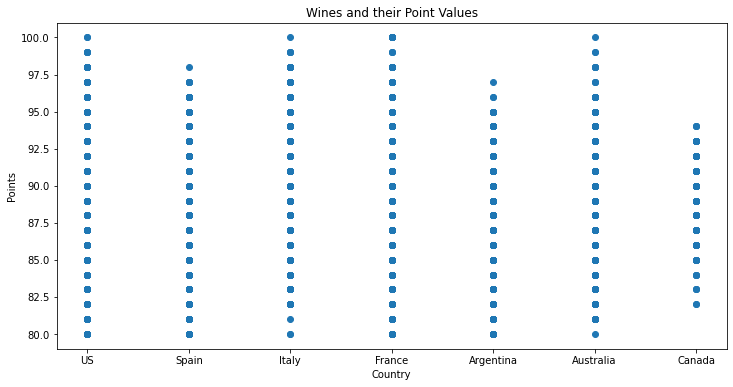

In [20]:
# Create the bar chart
plt.figure(figsize=(12,6))
plt.scatter(x_axis, y_axis)
plt.xlabel("Country")
plt.ylabel("Points")
plt.title("Wines and their Point Values")

### Box and Whisker to See the Spread of Price Data

In [ ]:
# Creating box and whisker for wine price
data_price = wine_df["price"]
 
fig = plt.figure(figsize =(6, 8))
 
# Creating plot
plt.boxplot(data_price)
plt.ylabel("Price")
plt.title("Price Ranges") 
# show plot
plt.show()

### Create a Chart with Price per Wine for Each Country

In [ ]:
#Make the x and y axes
x_axis = wine_df["country"]
y_axis = wine_df["price"]

In [ ]:
# Create the bar chart
plt.figure(figsize=(12,6))
plt.scatter(x_axis, y_axis)
plt.xlabel("Country")
plt.ylabel("Points")
plt.title("Wines and their Point Values")

### Create a Bar Chart for the Number of Wines from Each Discrete Country

In [ ]:
#find which countries are represented in df
x_axis = wine_df["country"].unique()

In [ ]:
#groupby each country
wines_by_country_df = wine_df.groupby(["country"]).count()
y_axis = wines_by_country_df["description"]

In [ ]:
# Create the bar chart
plt.figure(figsize=(16,6))
plt.bar(x_axis, y_axis, color="bisque", edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Number of Wines")
plt.title("Number of Wines by Country of Origin")